Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
Evaluate the models and compare the irrespective scores like R2, RMSE, etc.

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/uber.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/uber.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df=df.drop(['Unnamed: 0','key'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [ ]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


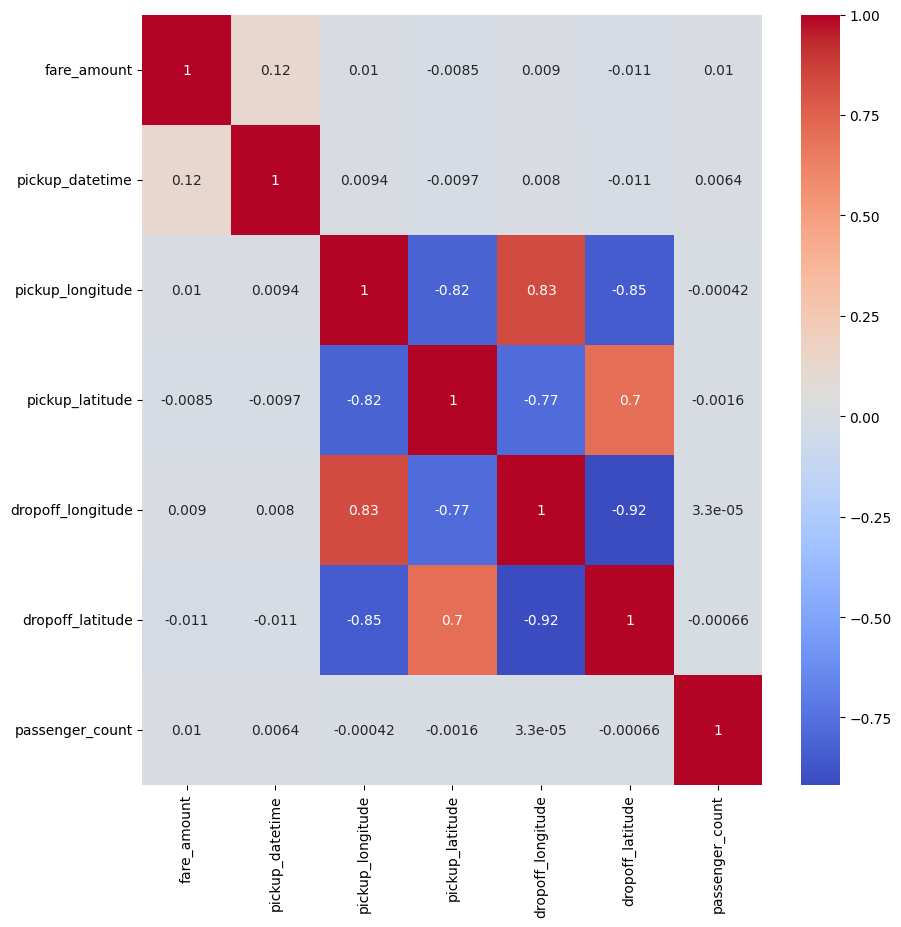

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

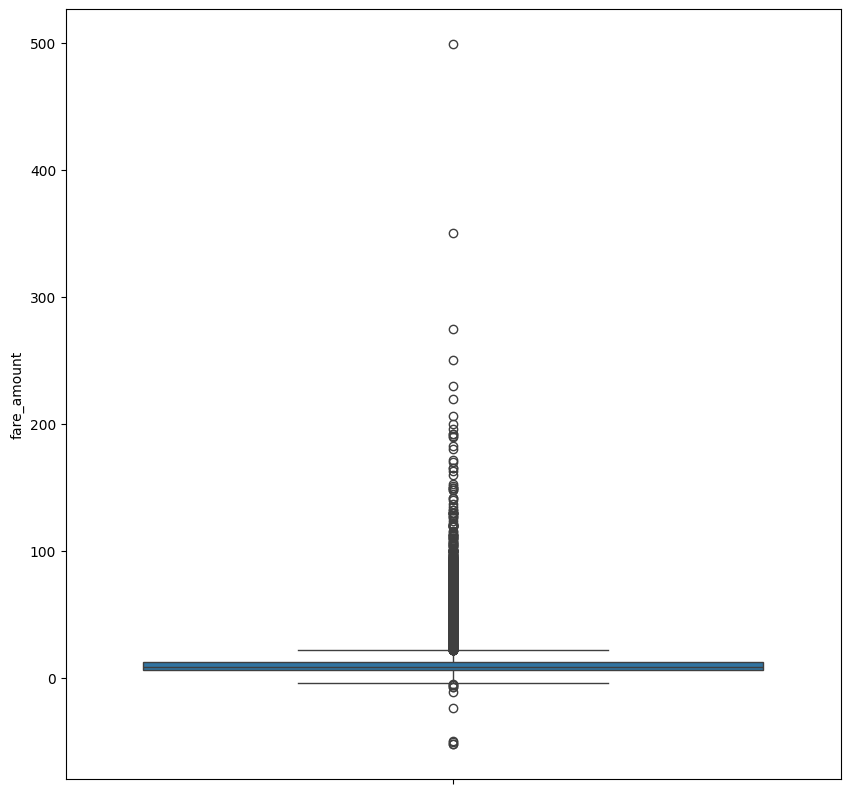

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df['fare_amount'])
plt.show()

In [ ]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df['fare_amount']>lower)&(df['fare_amount']<upper)]

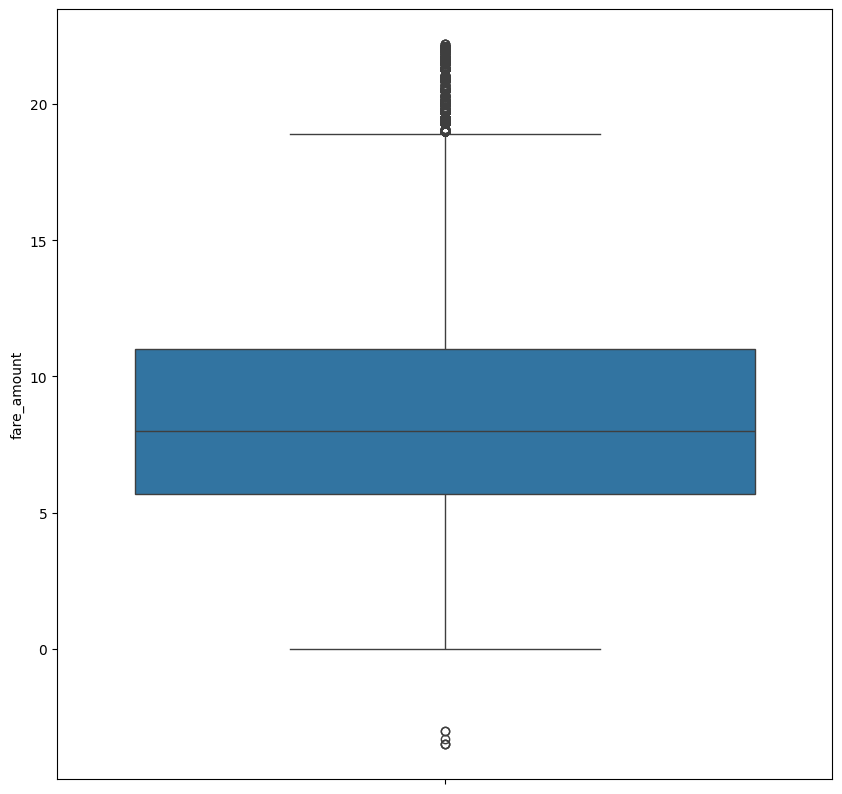

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df['fare_amount'])
plt.show()

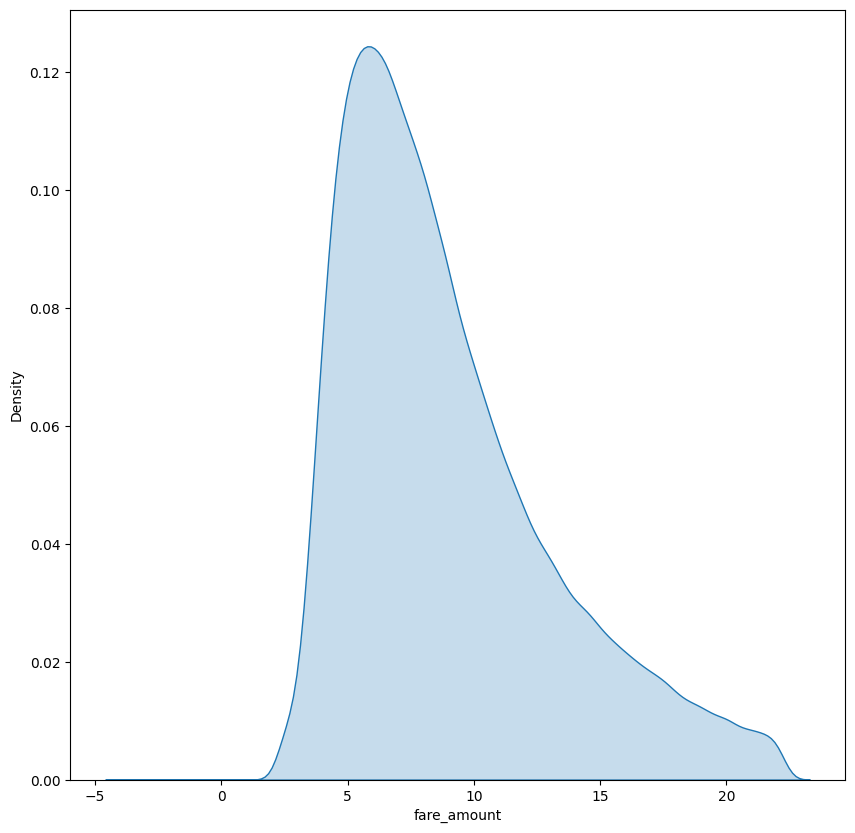

In [ ]:
plt.figure(figsize=(10,10))
sns.kdeplot(df['fare_amount'],fill=True)
plt.show()

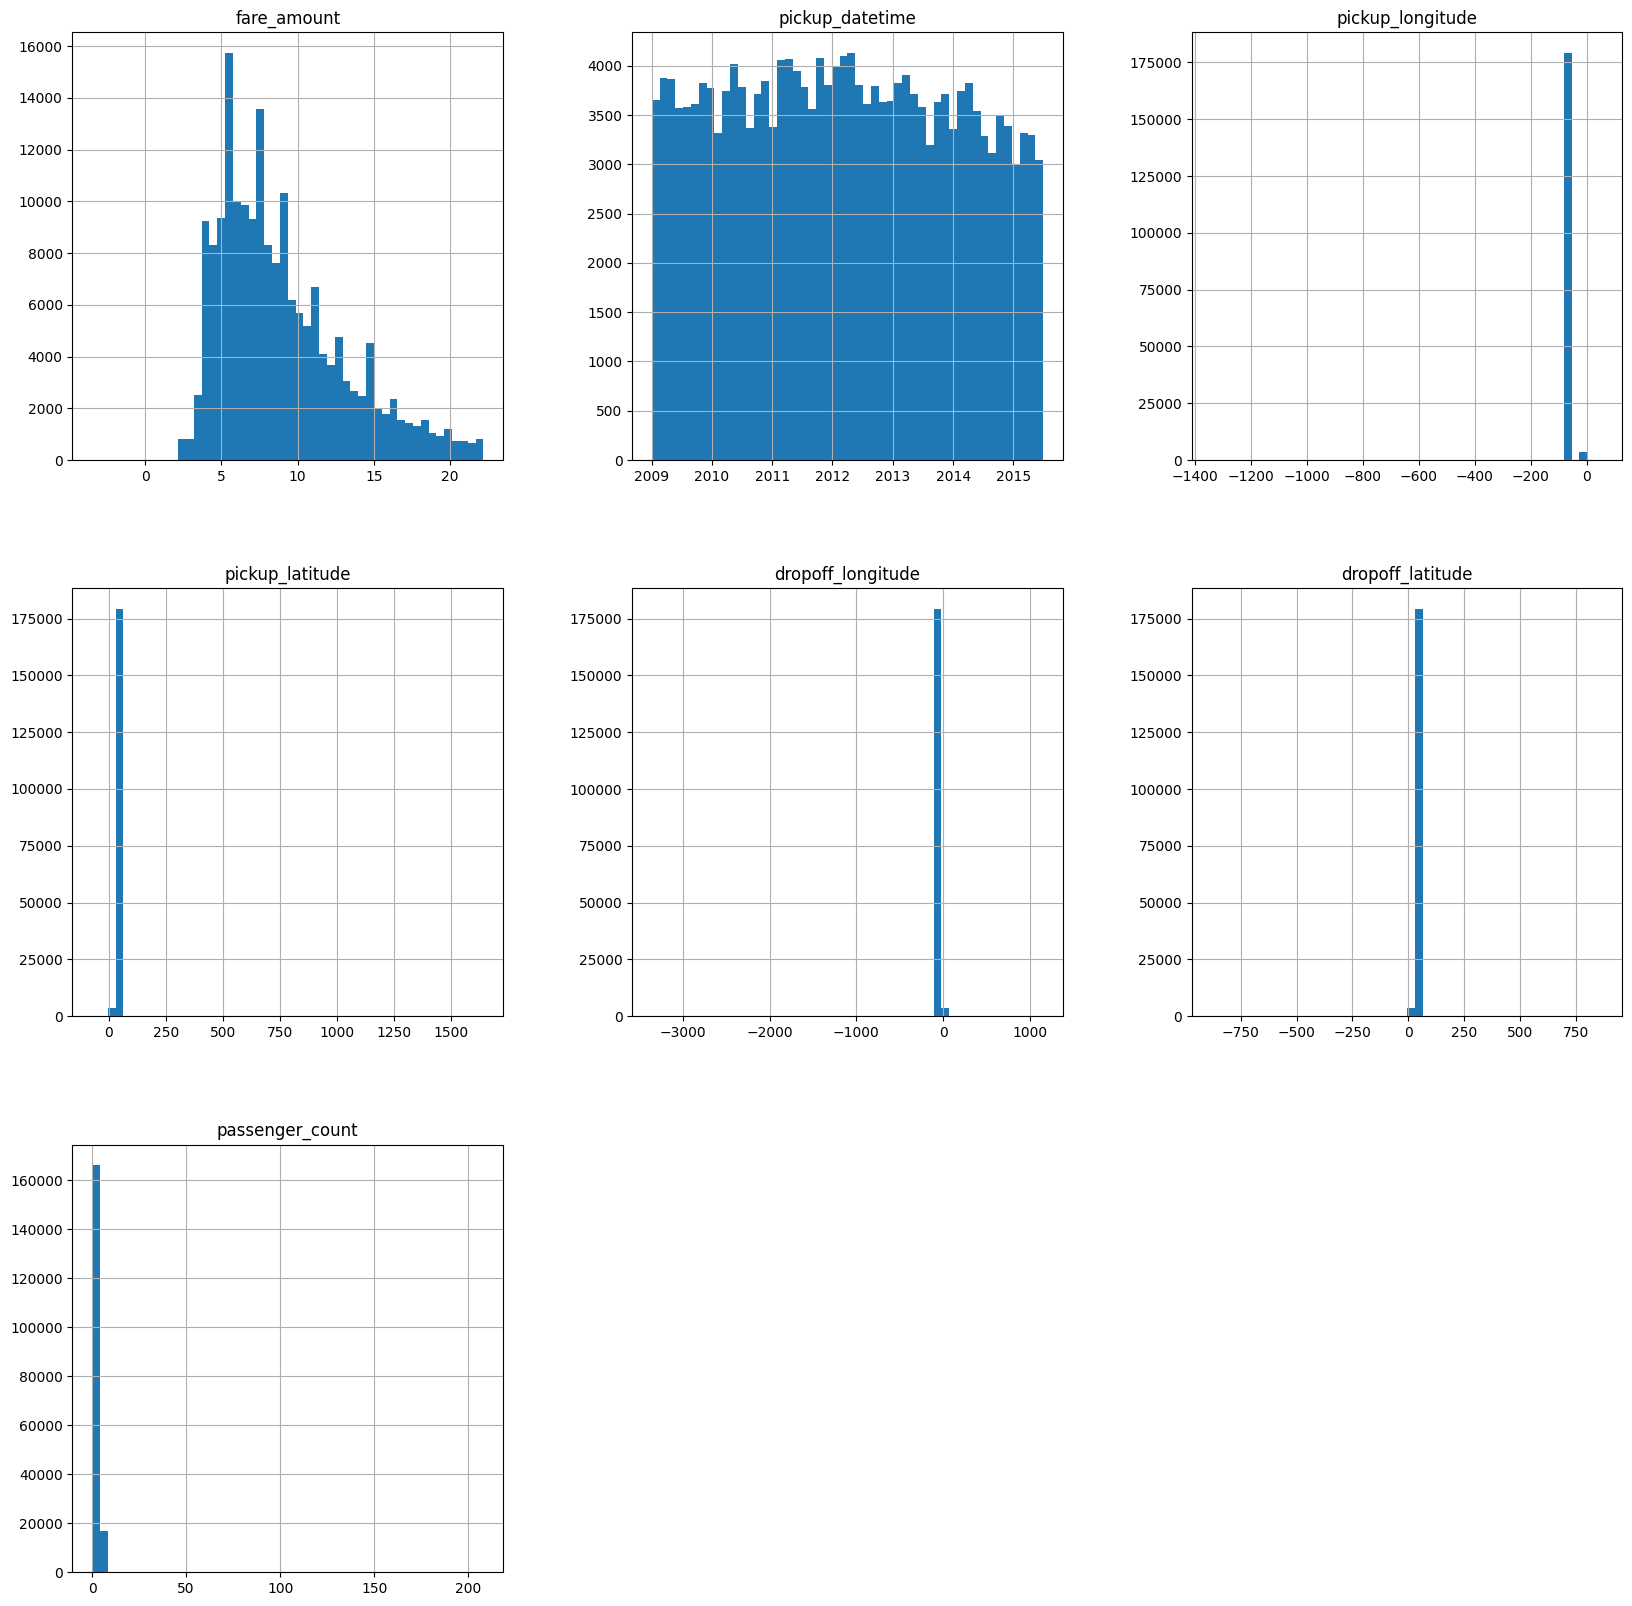

In [ ]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [ ]:
x=df.drop('fare_amount',axis=1)
y=df['fare_amount']

x['pickup_datetime']=pd.to_numeric(x['pickup_datetime'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train,y_train)

y_pred=linear.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('RMSE:',rmse)
print('MAE:',mae)
print('R2:',r2)

RMSE: 4.093467828045407
MAE: 3.2420987647186315
R2: 0.020837951064557658


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('RMSE:',rmse)
print('MAE:',mae)
print('R2:',r2)

RMSE: 2.108809897514435
MAE: 1.436357076052178
R2: 0.7401356691928394


Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State Not Spam, b) Abnormal State Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze the performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/emails.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
print(df.columns)
print(df.shape)
print(df['Prediction'].value_counts())

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)
(5172, 3002)
Prediction
0    3672
1    1500
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

from sklearn.preprocessing import scale
x=scale(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

print("accuracy: ", accuracy_score(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("classification report: \n", classification_report(y_test,y_pred))

accuracy:  0.9043478260869565
confusion matrix: 
 [[685  54]
 [ 45 251]]
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       739
           1       0.82      0.85      0.84       296

    accuracy                           0.90      1035
   macro avg       0.88      0.89      0.88      1035
weighted avg       0.91      0.90      0.90      1035



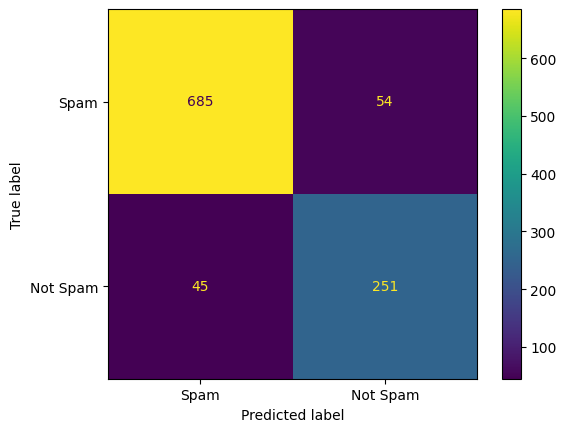

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cnf=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Spam','Not Spam'])
cnf.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC

svm=SVC(C=4)
svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

In [ ]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("classification report: \n", classification_report(y_test,y_pred))

accuracy:  0.966183574879227
confusion matrix: 
 [[729  10]
 [ 25 271]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       739
           1       0.96      0.92      0.94       296

    accuracy                           0.97      1035
   macro avg       0.97      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



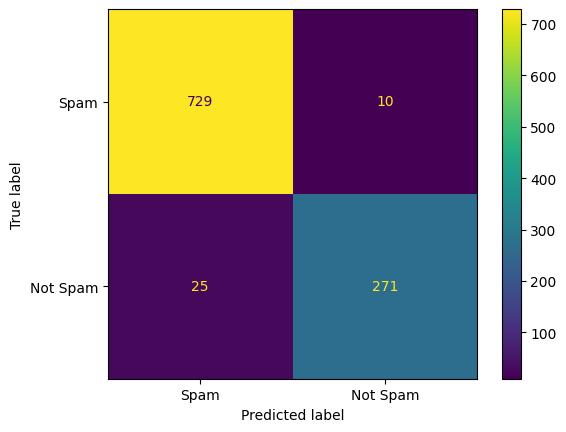

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cnf=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Spam','Not Spam'])
cnf.plot()
plt.show()

Given a bank customer, build an neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source data set from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as Customer Id, Credit Score, Geography, Gender, Age, Tenure, Balance etc. Perform following steps:

Read the dataset.
Distinguish the feature and target set and divide the dataset into training and test sets.
Normalize the train and test data.
Initialize and build the model. Identify the points of improvement and implement the same.
Print the accuracy score and confusion matrix (5points).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(['RowNumber',	'CustomerId',	'Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/tmp/ipython-input-3068719144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Exited',palette='coolwarm')


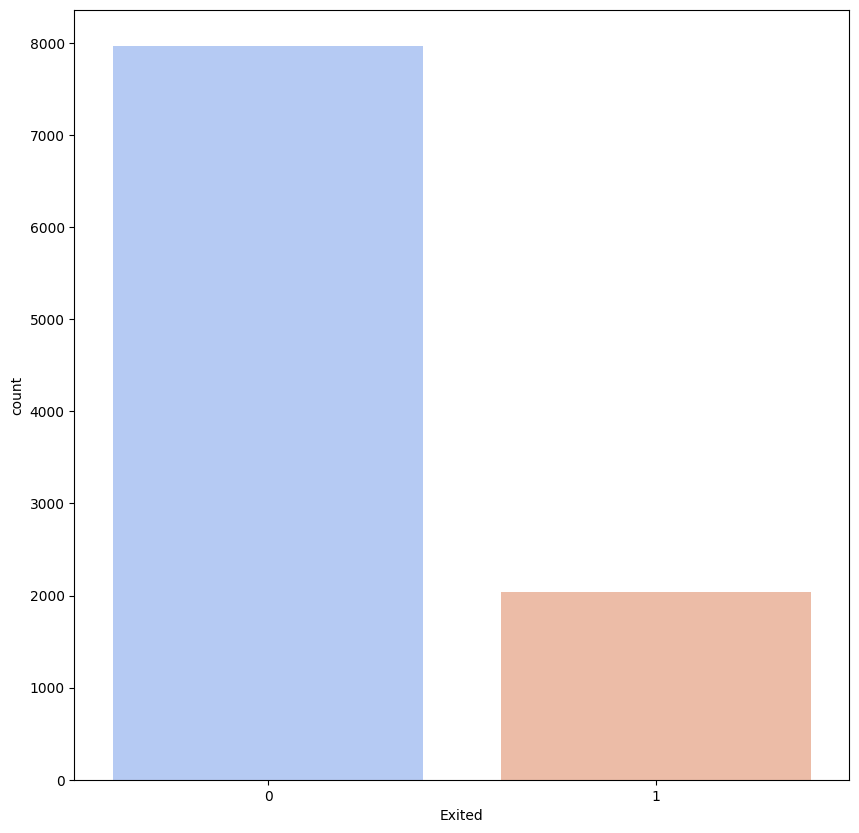

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df,x='Exited',palette='coolwarm')
plt.show()

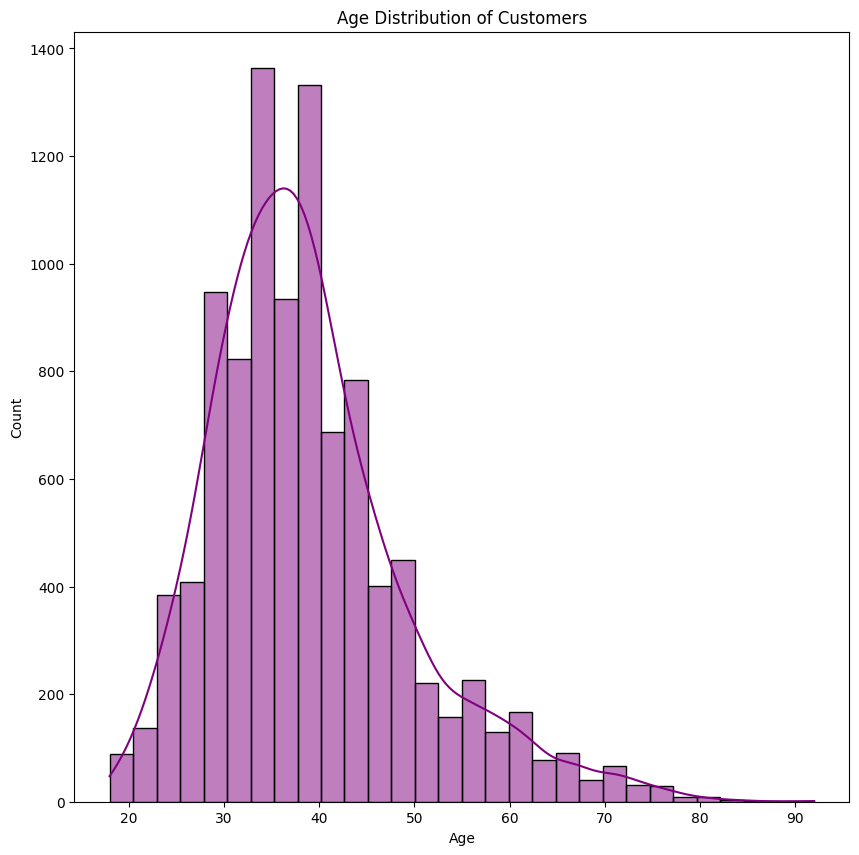

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df['Age'],bins=30,kde=True,color='purple')
plt.title('Age Distribution of Customers')
plt.show()

/tmp/ipython-input-2934123204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited',y='CreditScore',data=df,palette='coolwarm')


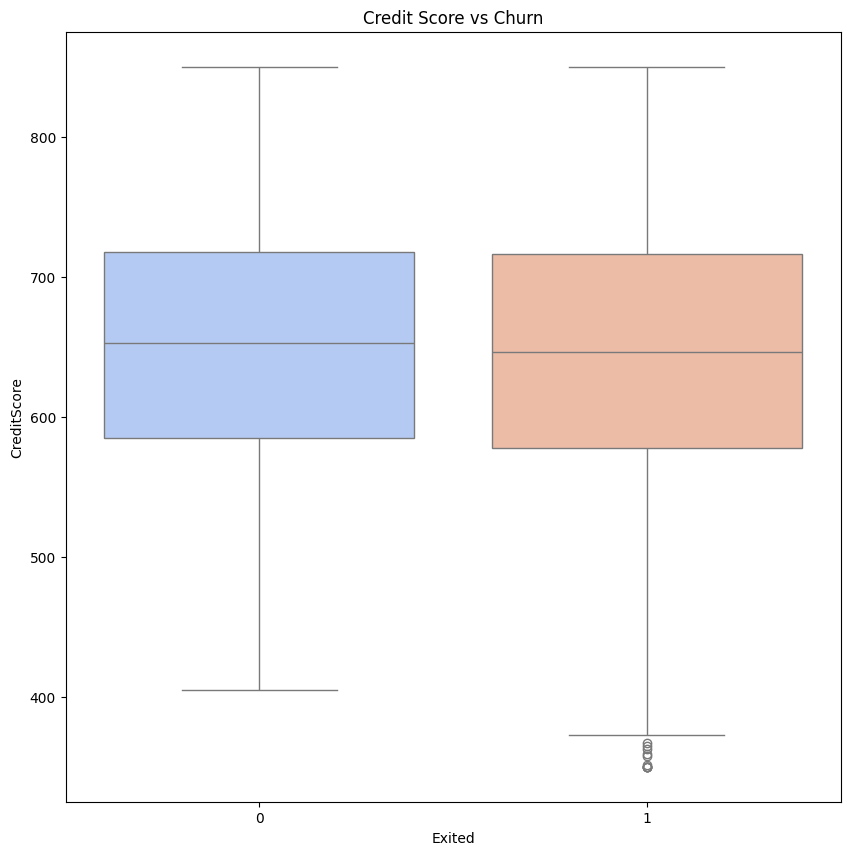

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Exited',y='CreditScore',data=df,palette='coolwarm')
plt.title('Credit Score vs Churn')
plt.show()


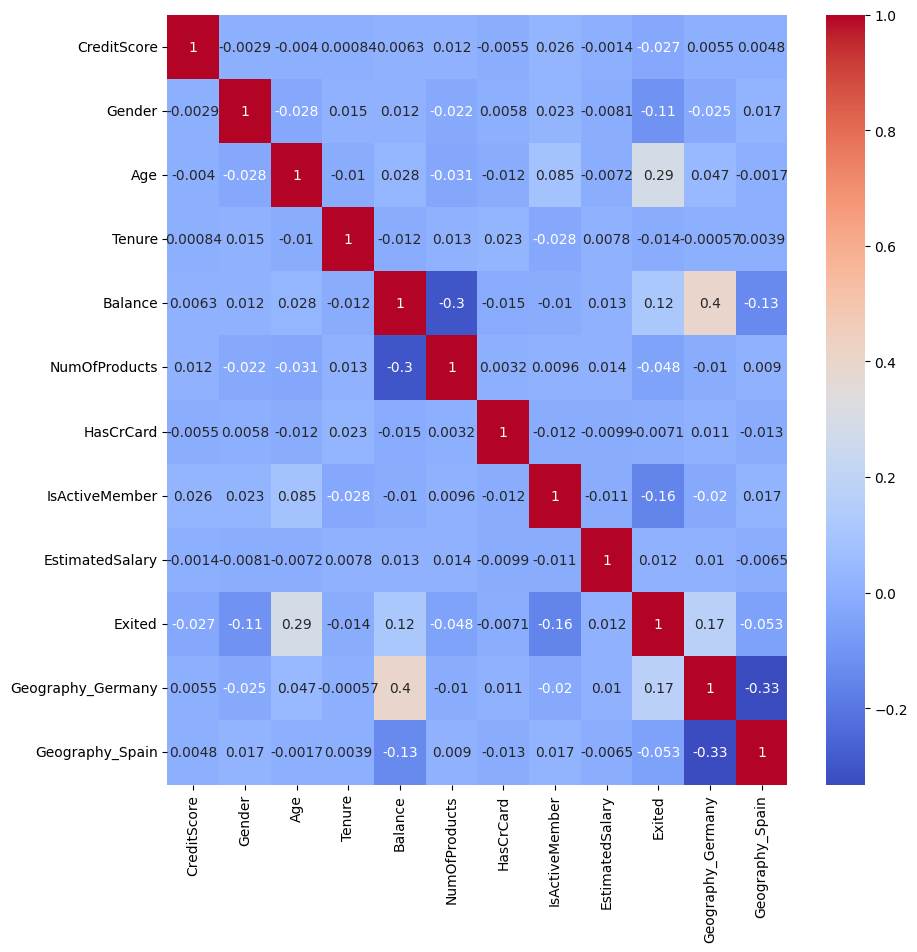

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential(
    [
        Dense(16,input_dim=x_train.shape[1],activation='relu'),
        Dropout(0.2),
        Dense(8,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0
)


In [ ]:
cy_pred_prob=model.predict(x_test)
y_pred=(y_pred_prob>0.5).astype(int)

acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n Model Evaluation")
print("Accuracy Score:", acc_score)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

 Model Evaluation
Accuracy Score: 0.863

Confusion Matrix:
 [[1535   72]
 [ 202  191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



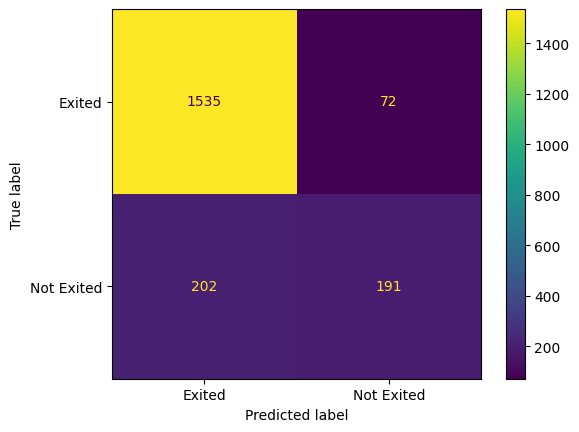

In [ ]:
cf = ConfusionMatrixDisplay(cm, display_labels=['Exited', 'Not Exited'])
cf.plot()
plt.show()

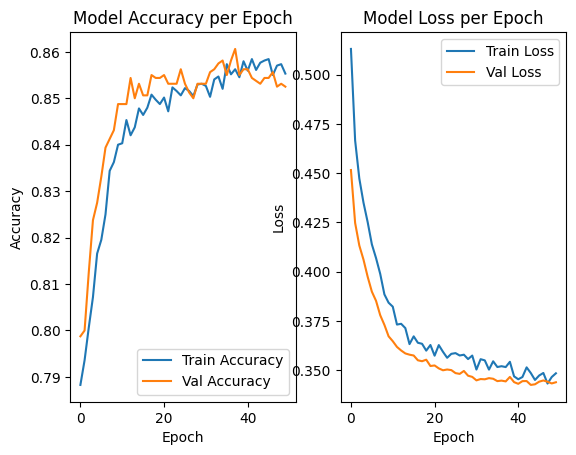

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Implement Gradient Descent Algorithm to find the local minima of a function. For example, find the local minima of the function y=(x+3)² starting from the point x=2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def func(x):
  return (x+3)**2

def grad(x):
  return 2*(x+3)

In [ ]:
x=2
learning_rate=0.1
epochs=50

x_vals=[x]
y_vals=[func(x)]

In [ ]:
for i in range(epochs):
  dx=grad(x)
  x=x-learning_rate*dx

  x_vals.append(x)
  y_vals.append(func(x))

  print(f'Iteration {i+1} , x={x:.5f} , func(x)={func(x):.5f}')

Iteration 1 , x=-0.44000 , func(x)=6.55360
Iteration 2 , x=-0.95200 , func(x)=4.19430
Iteration 3 , x=-1.36160 , func(x)=2.68435
Iteration 4 , x=-1.68928 , func(x)=1.71799
Iteration 5 , x=-1.95142 , func(x)=1.09951
Iteration 6 , x=-2.16114 , func(x)=0.70369
Iteration 7 , x=-2.32891 , func(x)=0.45036
Iteration 8 , x=-2.46313 , func(x)=0.28823
Iteration 9 , x=-2.57050 , func(x)=0.18447
Iteration 10 , x=-2.65640 , func(x)=0.11806
Iteration 11 , x=-2.72512 , func(x)=0.07556
Iteration 12 , x=-2.78010 , func(x)=0.04836
Iteration 13 , x=-2.82408 , func(x)=0.03095
Iteration 14 , x=-2.85926 , func(x)=0.01981
Iteration 15 , x=-2.88741 , func(x)=0.01268
Iteration 16 , x=-2.90993 , func(x)=0.00811
Iteration 17 , x=-2.92794 , func(x)=0.00519
Iteration 18 , x=-2.94235 , func(x)=0.00332
Iteration 19 , x=-2.95388 , func(x)=0.00213
Iteration 20 , x=-2.96311 , func(x)=0.00136
Iteration 21 , x=-2.97049 , func(x)=0.00087
Iteration 22 , x=-2.97639 , func(x)=0.00056
Iteration 23 , x=-2.98111 , func(x)=0.000

In [ ]:
print(f'Minima at x={x:.5f} , func(x)={func(x):.5f}')

Minima at x=-2.99995 , func(x)=0.00000


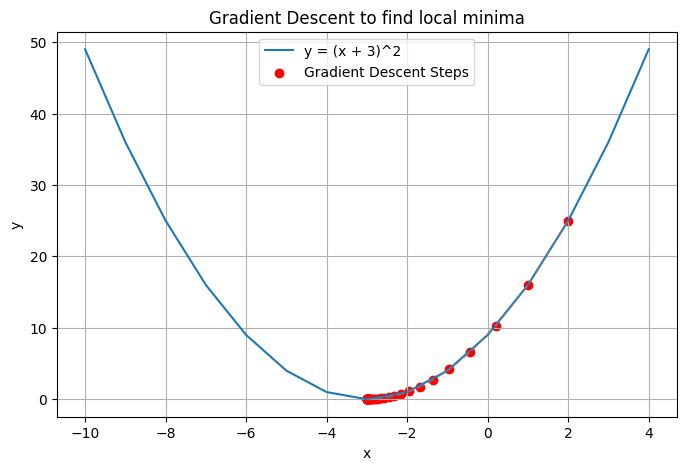

In [ ]:
x_plot=[i for i in range(-10,5)]
y_plot=[func(i) for i in x_plot]

plt.figure(figsize=(8,5))

plt.plot(x_plot,y_plot,label="y = (x + 3)^2")
plt.scatter(x_vals,y_vals,color='red',label="Gradient Descent Steps")
plt.plot(x_vals,y_vals,color='gray',linestyle='--',alpha=0.6)
plt.title("Gradient Descent to find local minima")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Implement K-Means clustering/hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#1. Load dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/sales_data_sample.csv',encoding='latin1')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
x=df[numeric_cols]

In [ ]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

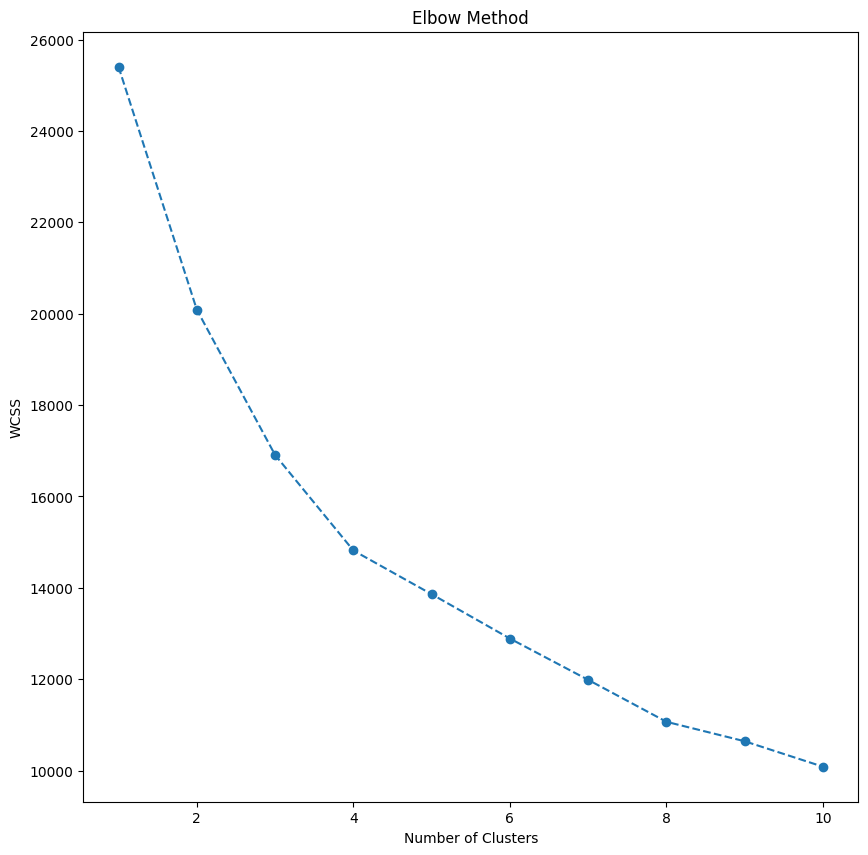

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k=4
kmeans=KMeans(n_clusters=k,random_state=42)
df['KMeans Cluster']=kmeans.fit_predict(x_scaled)
print("\nK-Means Clustering result:")
print(df.head())



K-Means Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0          

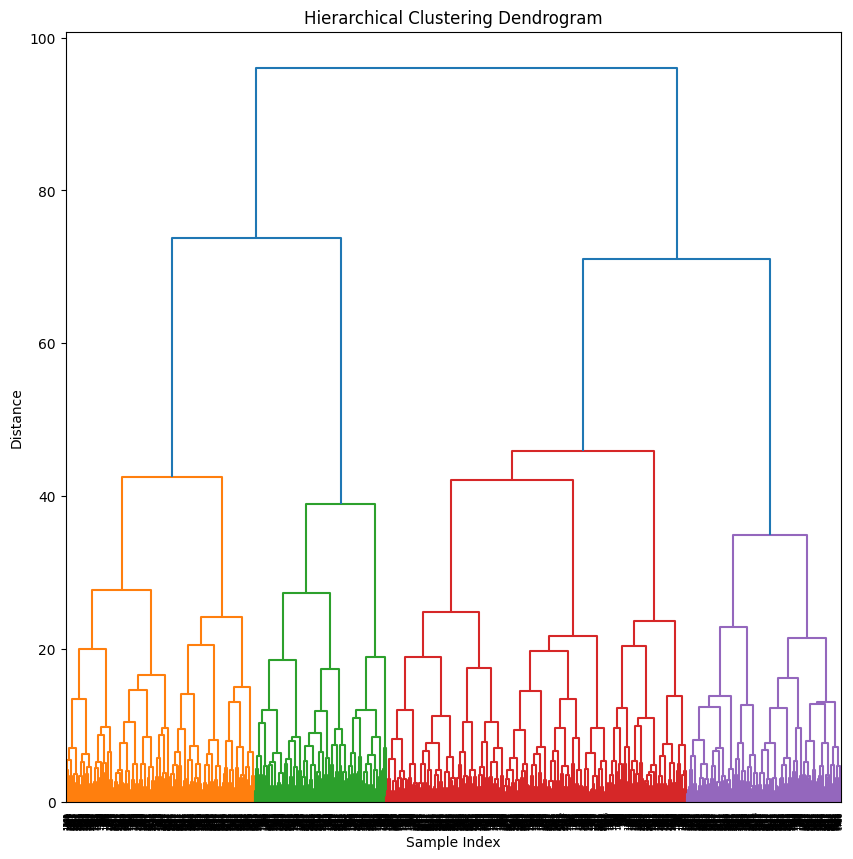


Hierarchical Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...            NYC   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          Reims   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          Paris   
3   8/25/2003 0:00  Shipped       3         8     2003  ...       Pasadena   
4  10/10/2003 0:00  Shipped       4        10     2003  ...  San Francisco   

   STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRS

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

linked=linkage(x_scaled,method='ward')

plt.figure(figsize=(10,10))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

df['Hier Cluster']=fcluster(linked,k,criterion='maxclust')
print("\nHierarchical Clustering result:")
print(df.head())